In [1]:
from pathlib import Path
import os

# Project root (where notebook is)
ROOT = Path.cwd()

# Force Keras cache into project folder
KERAS_HOME = ROOT / "data" / "keras"
KERAS_HOME.mkdir(parents=True, exist_ok=True)
os.environ["KERAS_HOME"] = str(KERAS_HOME)


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


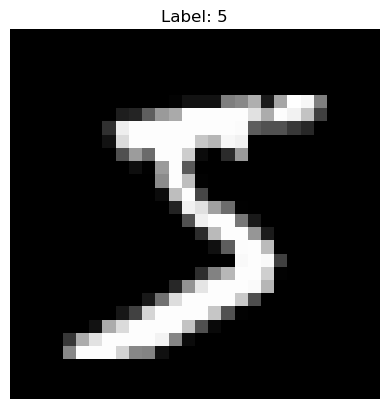

In [4]:
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


In [5]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model


In [6]:
trained_model = create_model()
untrained_model = create_model()


D:\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
trained_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

untrained_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [8]:
history = trained_model.fit(
    x_train, y_train,
    epochs=3,
    validation_split=0.1,
    verbose=1
)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2732 - val_accuracy: 0.9645 - val_loss: 0.1277
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1221 - val_accuracy: 0.9732 - val_loss: 0.0973
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9749 - loss: 0.0839 - val_accuracy: 0.9763 - val_loss: 0.0817


In [9]:
print("Untrained model accuracy:")
untrained_model.evaluate(x_test, y_test, verbose=0)

print("Trained model accuracy:")
trained_model.evaluate(x_test, y_test, verbose=0)


Untrained model accuracy:
Trained model accuracy:


[0.08511950820684433, 0.9749000072479248]

In [10]:
# Get trained parameters
trained_weights = trained_model.get_weights()

# Set them into untrained model
untrained_model.set_weights(trained_weights)


In [11]:
print("Untrained model AFTER set_weights:")
untrained_model.evaluate(x_test, y_test, verbose=0)


Untrained model AFTER set_weights:


[0.08511950820684433, 0.9749000072479248]

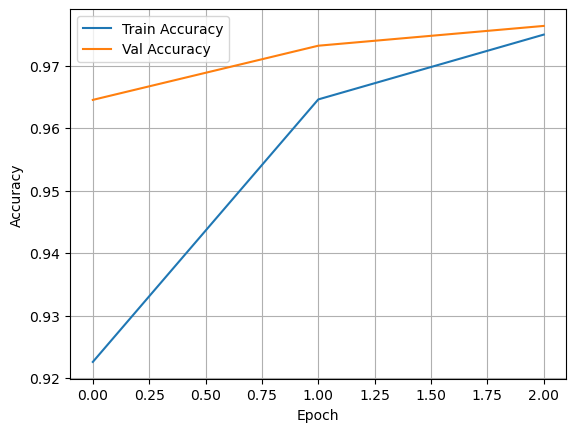

In [12]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
